# Feature Reduction

## Principle Component Analysis (PCA)

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = np.loadtxt('data.txt')

print(data.shape)

(244, 250)


# Split the data 80% for training and 20% for testing

In [9]:
a, b = data.shape

train = data[0:int(np.floor(0.8*a))]
test = data[int(np.floor(0.8*a)):a]

Apply PCA and retain a varying number of components

(195, 250)
[  1   5  10  15  25  50  75 100 125 150 200 250]
[[ 570.63010758  124.39468583  109.31661421   97.36240995   79.5343388
    54.93163504   43.30905548   37.51441446   34.74290217   33.55435202
    33.10993722   33.10993722]]
[[ 257.25942017  -33.22887844  -35.07438124  -36.43136832  -38.94069144
   -43.94275     -46.94321494  -48.86526288  -50.37812911  -51.66896879
   -52.90126516  -52.90126516]]


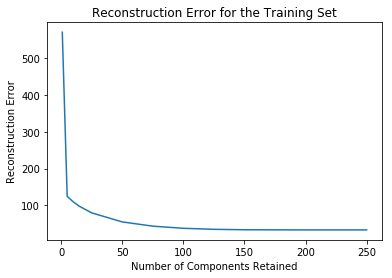

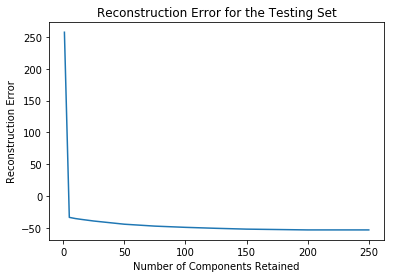

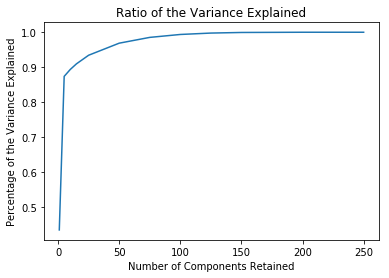

In [5]:
ns = np.array([1, 5, 10, 15, 25, 50, 75, 100, 125, 150, 200, 250])

reconstr_error_train = np.zeros((1,12))
reconstr_error_test = np.zeros((1,12))
variance_explained = np.zeros((1,12))

index = 0
for n in ns:
    pca = PCA(n_components=n, copy=True)
    pca.fit(train)
    train_PCA = pca.transform(train)
    test_PCA = pca.transform(test)

    reconstr_error_train[0, index] = np.sum( np.linalg.norm(train, axis=1) - np.linalg.norm(train_PCA, axis=1) )
    reconstr_error_test[0, index] = np.sum( np.linalg.norm(test, axis=1) - np.linalg.norm(test_PCA, axis=1) )
    variance_explained[0, index] = np.sum(pca.explained_variance_ratio_)
    index = index + 1
    

print(ns)
print(reconstr_error_train)
print(reconstr_error_test)

plt.plot(ns, np.transpose(reconstr_error_train))
plt.title('Reconstruction Error for the Training Set')
plt.xlabel('Number of Components Retained')
plt.ylabel('Reconstruction Error')
plt.show()

plt.plot(ns, np.transpose(reconstr_error_test))
plt.title('Reconstruction Error for the Testing Set')
plt.xlabel('Number of Components Retained')
plt.ylabel('Reconstruction Error')
plt.show()

plt.plot(ns, np.transpose(variance_explained))
plt.title('Ratio of the Variance Explained')
plt.xlabel('Number of Components Retained')
plt.ylabel('Percentage of the Variance Explained')
plt.show()